In [2]:
import numpy as np
from scipy.interpolate import approximate_taylor_polynomial
import matplotlib.pyplot as plt
from scipy import special, linalg
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

## Выделение гармонической части гамильтониана
$\frac{H}{E_J}=\frac{p^2}{2ME_J}+\frac{(\varphi-\varphi_{ex})^2}{2lq}+(1-\cos{\varphi})$

Считаем, что импульс в единицах $p_{old} = p_{new}\sqrt{ME_J}$, тогда 
$\frac{p_{old}^2}{2ME_J} = \frac{p_{new}^2}{2} =\frac{p^2}{2} $, а координата $\varphi_{old} = \varphi_{new}\sqrt{lq} = \varphi\sqrt{lq}$.

$\frac{H}{E_J}=\frac{p^2}{2}+\frac{\varphi^2}{2}-\frac{\varphi_{ex}\varphi}{\sqrt{lq}}+\frac{\varphi_{ex}^2}{2lq}+(1-\cos{\varphi\sqrt{lq}})$

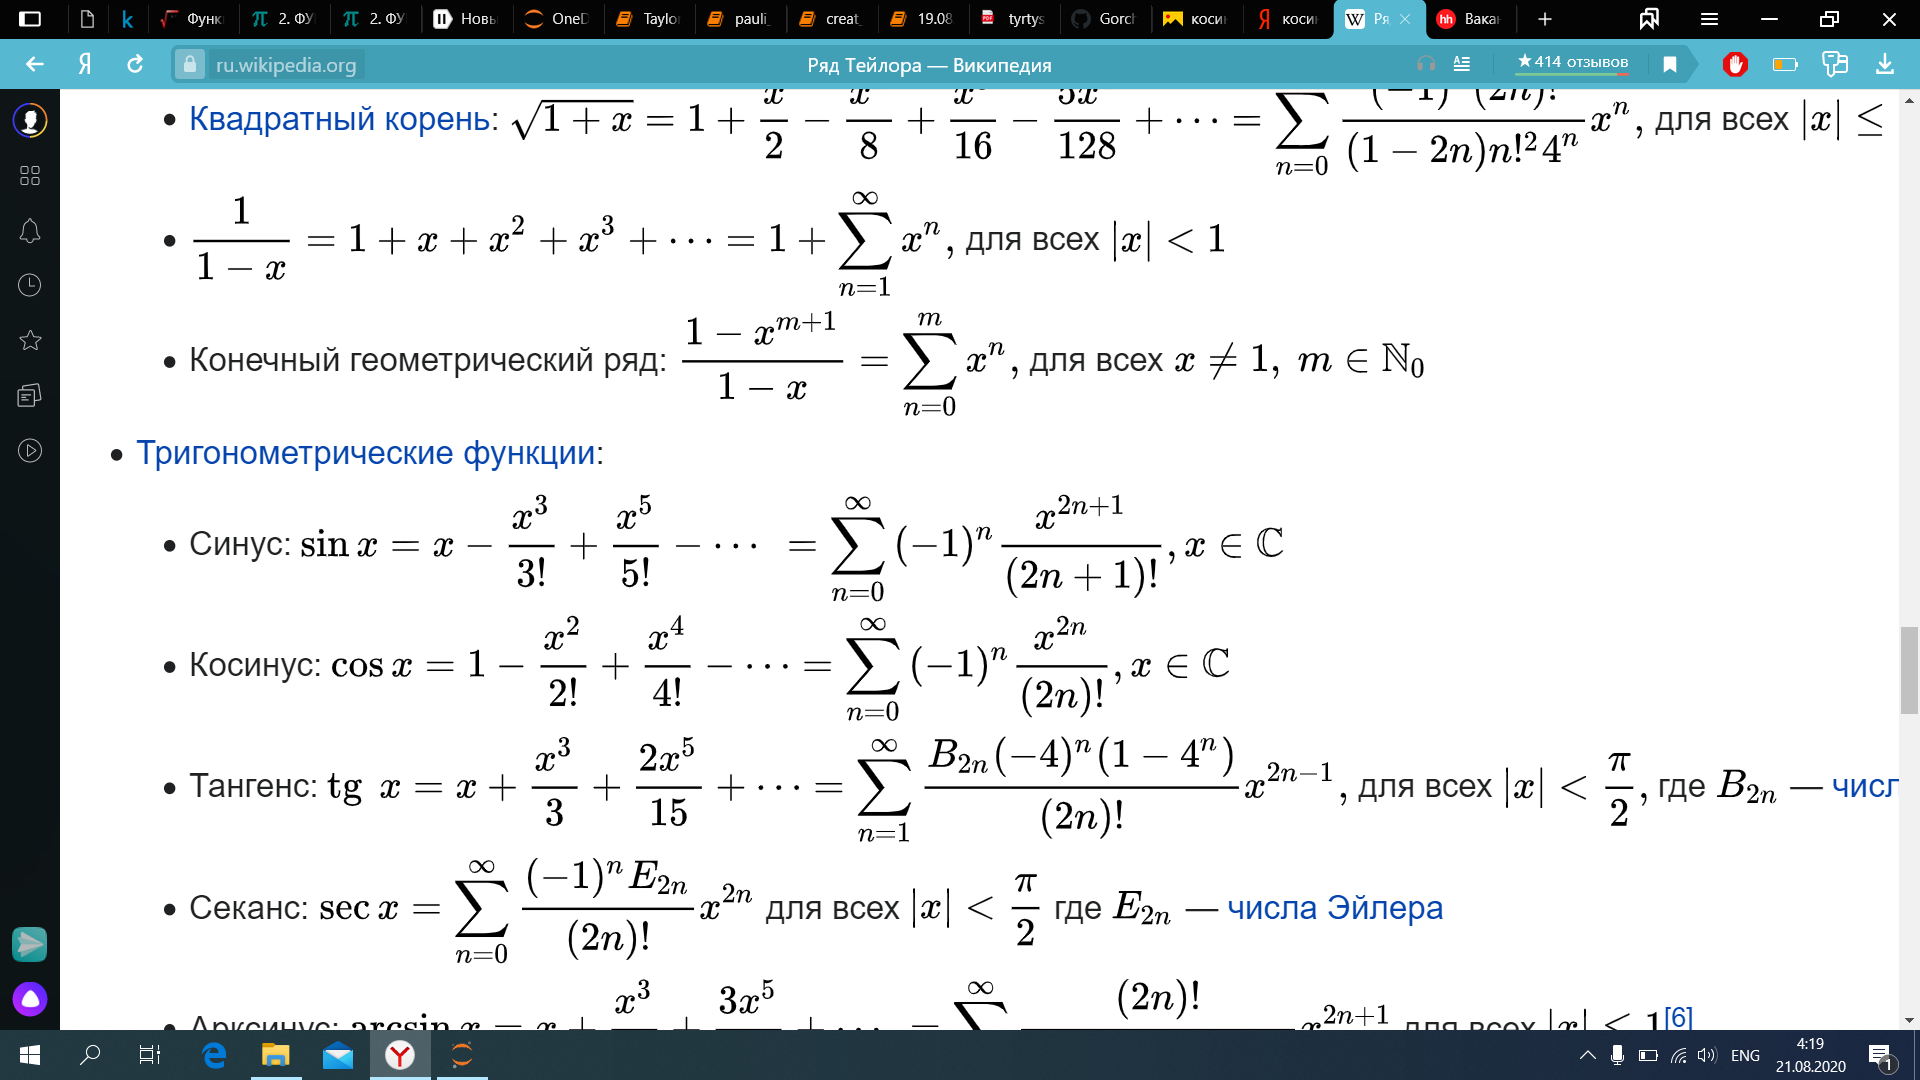

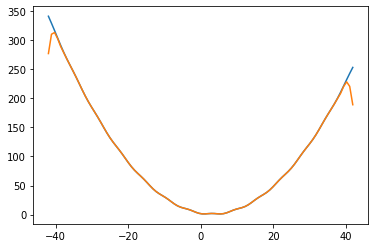

In [207]:
# phix - сдвиг по координате. перенормировка переменной будет влиять на пареметры phix
def U(phi):
    return (phi - phix)**2/(2*lq) + 1 - np.cos(phi)
# степень ряда = 2n
def U1(x, n):
    s = 0
    for i in range(0,n+1):
        coef = (-1)**i
        num = x**(2*i)
        s = s + coef*num/special.factorial(2*i)
    return (x - phix)**2/(2*lq) + 1 - s

#def U1(phi,n):
#    return (phi - phix)**2/(2*lq) + 1 - approximate_taylor_polynomial(np.cos, 0, n, 1)(phi)
 

phix = np.pi
lq = 3
x_start = -42
x_end = 42
x = np.linspace(x_start, x_end, 100)
plt.plot(x, U(x))
plt.plot(x, U1(x, 53))
plt.show()

In [4]:
#from scipy.interpolate import approximate_taylor_polynomial
#n = 100
#cos_taylor = approximate_taylor_polynomial(np.cos, phix, n, 1)
#plt.plot(x, cos_taylor(x))

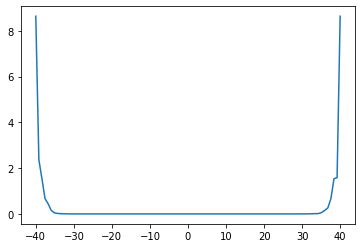

In [105]:
#проверка точности совпадения
plt.plot(x, np.abs(U(x)-U1(x, 60)))
plt.show()

 ## Переход к операторам рождения и уничтожения

$x_{new} = \frac{a+a^+}{\sqrt2}$

$\frac{H}{E_J} = N + (3/2+\frac{\varphi_{ex}^2}{2lq})E - \frac{\varphi_{ex}}{\sqrt{2lq}}(a+a^+) -\cos(\sqrt{\frac{lq}{2}}(a+a^+)
) $

In [335]:
# функция разложения в ряд порядка n
 
#def tay_cos(x,n):
#    s = 0
#    for i in range(0,n):
#         s = s + (-1)**i*np.linalg.matrix_power(x,2*i)/special.factorial(2*i)
#    return s

#генератор коэффициентов разложения
def tay_cos(x,n):
    s = np.array([(-1)**j/special.factorial(2*j) for j in range(1,n+1)]).astype('float64')
    XX = np.dot(x,x).astype('float64')
    X2 = XX.astype('float64')
    fun = np.eye(len(x))
    for i in range(1,n+1):
        fun = fun + s[i-1]*XX # нумерация с нуля
        fun[np.isnan(fun)] = 0
        XX = np.dot(XX,X2).astype('float64')
        XX[np.isnan(XX)] = 0
    return fun
 

In [336]:
S = 1000 #размерность матрицы   
#S_test = 10000
 
# параметры графика
width = 8
high = 6

In [337]:
def N(S):
    N = np.zeros((S,S))
    for i in range(1,S):
        N[i][i] = i
    return N

def a_crtn(S):
    a_crtn = np.zeros((S,S))
    for i in range(1,S):
        a_crtn[i-1][i] = np.sqrt(i)
    return a_crtn
    
def a_anh(S):
    a_anh = np.zeros((S,S))
    for i in range(1,S):
        a_anh[i][i-1] = np.sqrt(i)
    return a_anh

# используем в основном a_crtn + a_anh = a
def a(S):
    a = np.zeros((S,S))
    for i in range(1,S):
        a[i-1][i] = a[i][i-1] = np.sqrt(i)
    return a
#H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - phix/np.sqrt(2*lq)*a(S)-np.cos(np.sqrt(lq/2)*a(S))
#H_test = N(S_test) + (3/2 + phix**2/(2*lq))*np.eye(S_test) - phix/np.sqrt(2*lq)*a(S_test)-np.cos(np.sqrt(lq/2)*a(S_test))
 

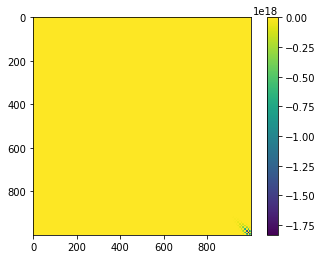

In [340]:
# матрица косинуса
cos_a = tay_cos(np.sqrt(lq/2)*a(S), 75).astype('float64')
#----------------------------------------------------
# вырисовка матрицы косинуса
plt.imshow(cos_a)
plt.colorbar()
plt.show()

In [341]:
cos_a[S-1,S-1] #значение последнего элемента диагонали совпадает с соответствующим в математике при одинаковой степени (20)

-4.054086187949802e+16

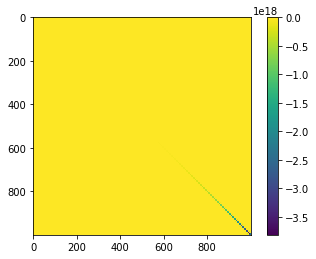

In [294]:
H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - (phix/np.sqrt(2*lq))*a(S) - cos_a
#----------------------------------------------------
# вырисовка матрицы гамильтониана
plt.imshow(H)
plt.colorbar()
plt.show()

In [295]:
eigvals, eigvecs = linalg.eigh(H)

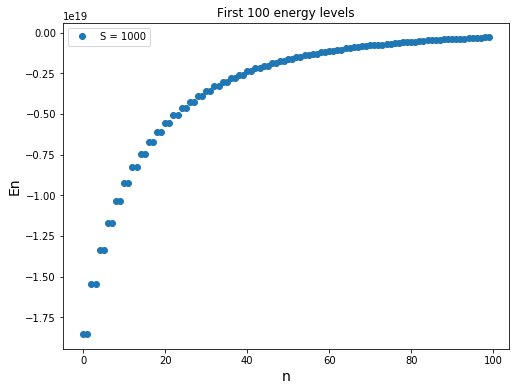

In [296]:
en_plot_num = 100
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], 'o',label="S = {}".format(S))
#plt.plot(eigvals_test[:en_plot_num], 'o',label="S_test = {}".format(S_test))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

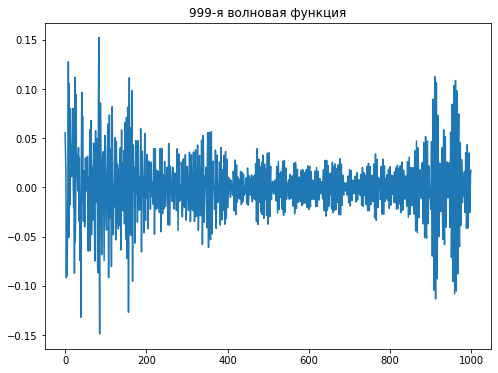

In [299]:
num = S-1
plt.figure(figsize=(width, high))
plt.plot(eigvecs[:,num],label="Current line {} ".format(20)) 
plt.title('{}-я волновая функция'.format(num))
plt.show()